In [1]:
# Book Recommendation System

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# read BX-Books data

books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1", low_memory=False)

C:\Users\mdani\AppData\Local\Temp\ipykernel_3616\2245129533.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1", low_memory=False)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\nSkipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\nSkipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\nSkipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 22

In [11]:
books.columns=['ISBN', 'bookTitke', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [14]:
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")

C:\Users\mdani\AppData\Local\Temp\ipykernel_3616\413579773.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")


In [15]:
users.columns=['userID', 'Location', 'Age']

In [16]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding='latin-1')

C:\Users\mdani\AppData\Local\Temp\ipykernel_3616\323299260.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding='latin-1')


In [18]:
ratings.columns=['userID','ISBN','bookRating']

In [19]:
ratings.shape

(1149780, 3)

In [20]:
list(ratings.columns)

['userID', 'ISBN', 'bookRating']

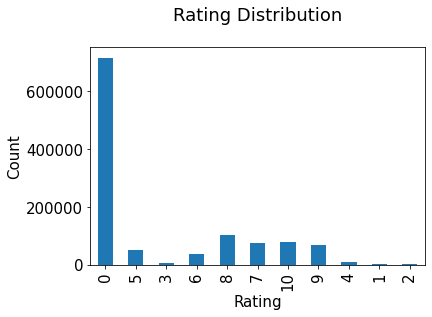

In [22]:
plt.rc('font', size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [24]:
books.shape

(271360, 8)

In [25]:
list(books.columns)

['ISBN',
 'bookTitke',
 'bookAuthor',
 'yearOfPublication',
 'publisher',
 'imageUrlS',
 'imageUrlM',
 'imageUrlL']

In [26]:
users.shape

(278858, 3)

In [27]:
list(users.columns)

['userID', 'Location', 'Age']

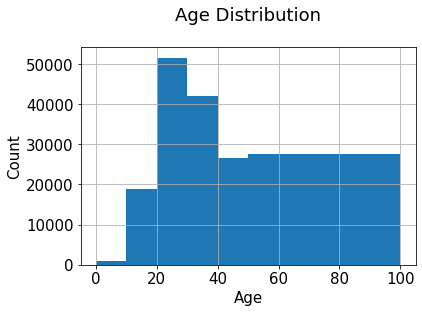

In [32]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png',bbox_inches='tight')
plt.show()

In [33]:
# Recommendation Based on Rating Counts

In [35]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head()

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [ ]:
# The book ISBN "0971880107" received the most rating counts.
# Let´s find out what book it is 
# what books are in the top 5

In [38]:
most_rated_books = pd.DataFrame(['0971880107','0316666343','0385504209','0060928336','0312195516'], index=np.arange(5), columns=['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,bookTitke,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [ ]:
# Recommendations Based on Correlations

# we use Pearson´s R correlation coefficient to measure the linear correlation between two variables, 
# in our case, the ratings for two books.
# First we need to find out the average rating and the number of ratings each book received



In [39]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())

In [40]:
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())

In [41]:
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [ ]:
# Observations: In this data set, the book that received the most rating counts was not highly rated at all. 
# As a result, if we were to use recommendations based on rating counts, we would definitly make mistakes here
# So, we need to have a better system


In [ ]:
# To ensure statistical significance, users with less than 200 ratings and books with less than 100 ratings are excluded


In [42]:
counts1 = ratings['userID'].value_counts()

In [43]:
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]

In [44]:
counts = ratings['bookRating'].value_counts()

In [45]:
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [ ]:
# Rating matrix
# we convert the ratings table to a 2D matrix
# The matrix will be sparse because not every user rated every book


In [46]:
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating

In [47]:
userID = ratings_pivot.index

In [48]:
ISBN = ratings_pivot.columns

In [49]:
ratings_pivot.shape

(905, 207699)

In [50]:
ratings_pivot.head()

ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
bones_ratings = ratings_pivot['0316666343']

In [54]:
similar_to_bones = ratings_pivot.corrwith(bones_ratings)

C:\Users\mdani\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\mdani\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [56]:
# pearsonR

In [57]:
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])

In [58]:
corr_bones.dropna(inplace=True)

In [59]:
corr_summary = corr_bones.join(average_rating['ratingCount'])

In [60]:
corr_summary[corr_summary['ratingCount'] >= 300].sort_values('pearsonR', ascending=False).head()

,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
